## Hands-on - Visualisation

In [1142]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import shapiro

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/World-happiness-report-updated_2024.csv"

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")
print(df.head(5))

Dataset Preview:
  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative a

### **Question 1: Create a histogram of the 'Life Ladder'**
#### Hint: Use plt.hist() or sns.histplot() to show distribution of a single variable

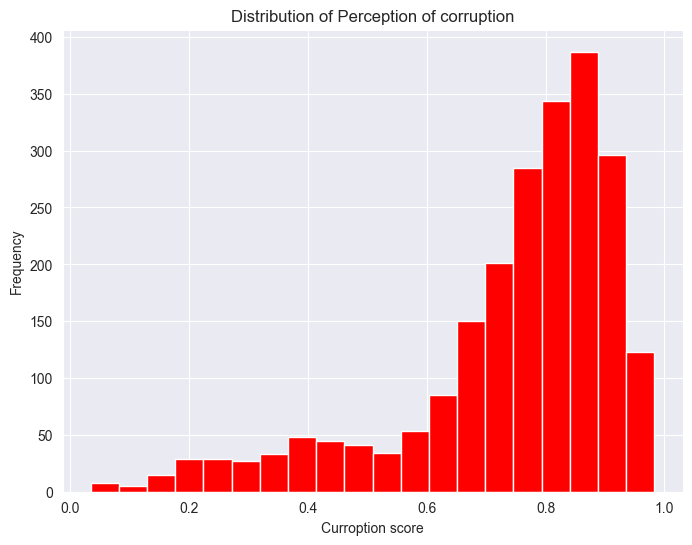

In [1143]:
#histogram of life ladder distribution
plt.figure(figsize=(8,6))
plt.hist(df['Perceptions of corruption'],bins=20,color= 'red')
plt.title('Distribution of Perception of corruption')
plt.xlabel('Curroption score')
plt.ylabel('Frequency')

plt.show()


### **Question 2: Create a scatter plot of 'Log GDP per capita' vs 'Life Ladder'**
#### Hint: Use sns.scatterplot(x=..., y=...) or plt.scatter()

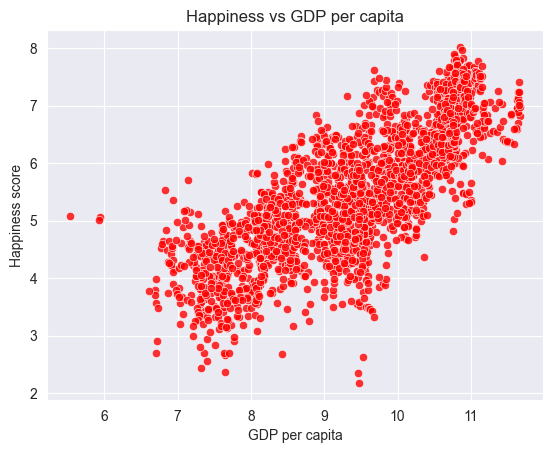

In [1144]:
#create Life ladder vs gdb scatterplot
sns.scatterplot(x='Log GDP per capita',y ='Life Ladder',data = df,alpha=0.8,color="red")
plt.title('Happiness vs GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness score')
plt.show()




### **Question 3: Create a box plot to show distribution of 'Life Ladder' by 'year'**
#### Hint: Use sns.boxplot(x='Regional indicator', y='Life Ladder', data=df) and rotate x-labels for readability

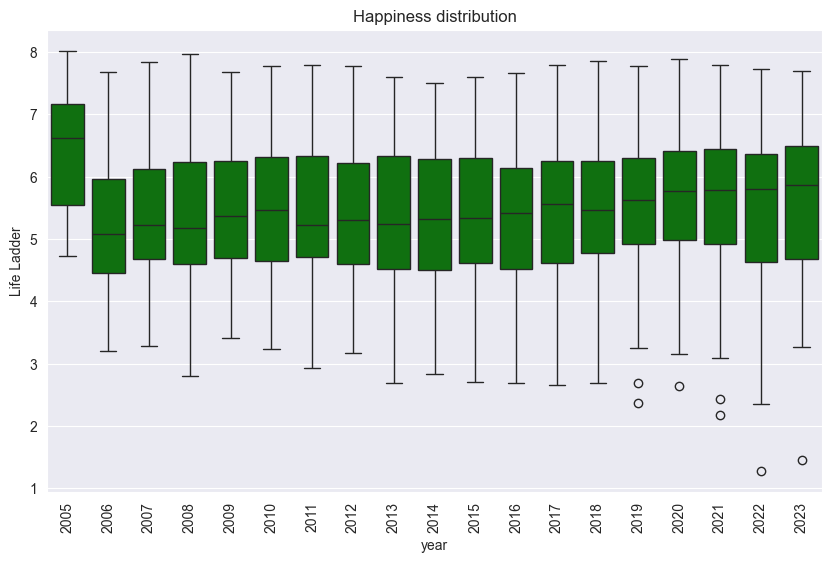

In [1145]:
# check distribution of Life ladder by year
plt.figure(figsize=(10,6))
sns.boxplot(x= 'year',y='Life Ladder',data=df,color= 'green')
plt.title('Happiness distribution')
plt.xticks(rotation=90)

plt.show()





### **Question 4: Create a heatmap to show correlation between numerical features**
#### Hint: Use df.corr() to calculate correlation matrix, then sns.heatmap()

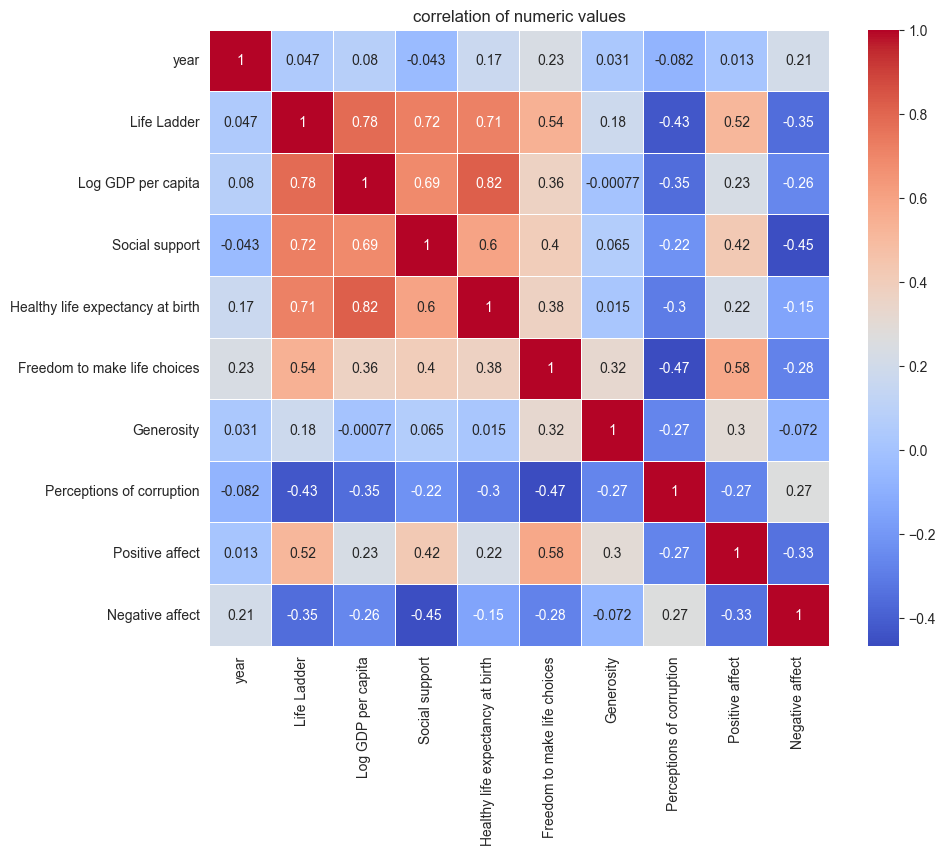

In [1146]:
#check correlation between numerical values
corr = df.select_dtypes(include='number').corr() #get correlation from numeric values
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap="coolwarm",linewidths=0.4)
plt.title('correlation of numeric values')
plt.show()





### **Question 5: Create a residual plot for 'Life Ladder' prediction using 'Log GDP per capita'**
#### Hint: Use LinearRegression to predict, then subtract predictions from actuals and plot with plt.scatter()

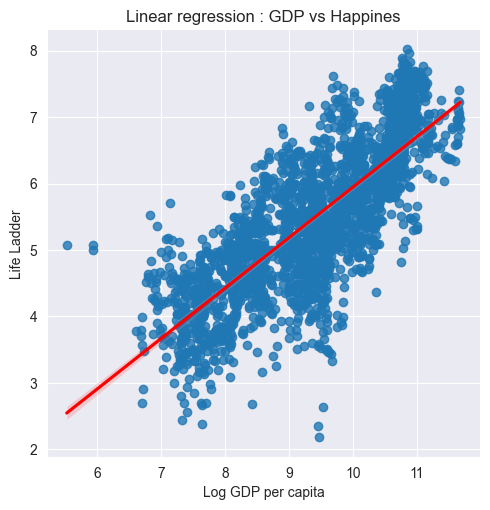

In [1147]:

# Create a scatter plot with a fitted linear regression line
sns.lmplot(x='Log GDP per capita', y='Life Ladder', data=df, line_kws={'color': 'red'})

plt.title('Linear regression : GDP vs Happiness')
plt.show()



### **Question 6: Create a line plot showing 'Healthy life expectancy at birth' over years for top 5 countries**
#### Hint: Group by 'Country name', take top 5 by average life expectancy, then use sns.lineplot() to show trends over time

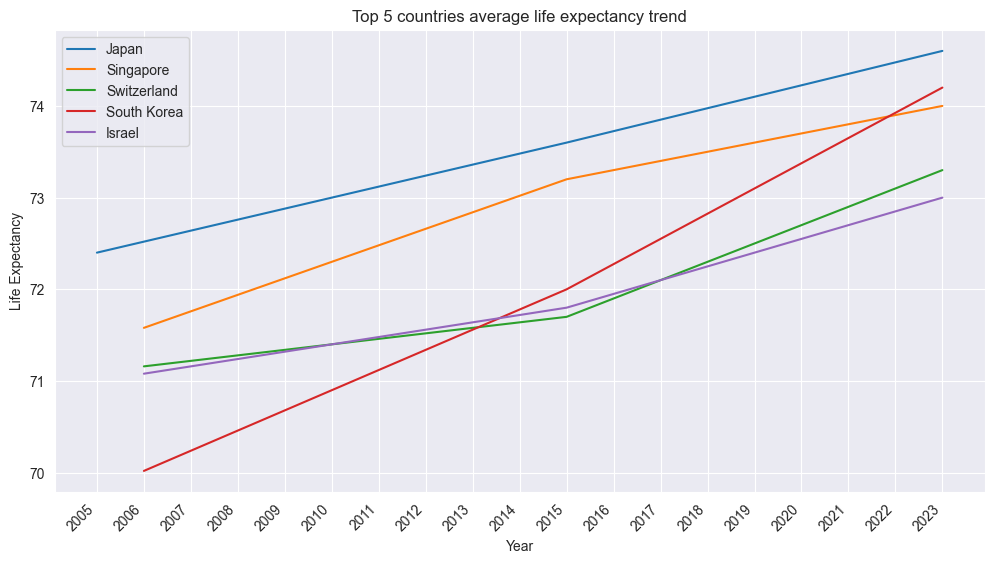

In [1148]:

plt.figure(figsize=(12,6))
# Group by both 'Country name' and 'year'
df_grouped = df.groupby(['Country name', 'year'])['Healthy life expectancy at birth'].mean().reset_index()
# Get top 5 countries by average life expectancy
df_top5 = df_grouped.groupby('Country name')['Healthy life expectancy at birth'].mean().sort_values(ascending=False).head(5).reset_index()

# make list from country names
top5_countries = df_top5['Country name'].tolist()


# Collect all unique years to use as x-axis ticks
years = sorted(df_grouped['year'].unique())


for country in top5_countries:
    country_data =df_grouped[df_grouped['Country name']==country]
    plt.plot(
        country_data['year'],
        country_data['Healthy life expectancy at birth'],
        label = country)
    
    
    
# Set x-axis ticks to full years only
plt.xticks(ticks=years, labels=years, rotation=45, ha='right')


plt.title('Top 5 countries average life expectancy trend'
)

plt.ylabel('Life Expectancy')
plt.xlabel('Year')
plt.legend()
plt.show()



### **Question 7: Create a bar chart of average 'Social support' for top 10 countries in 2023**
#### Hint: Filter the dataset for 2023, group by 'Country name', then plot the top 10 using bar chart

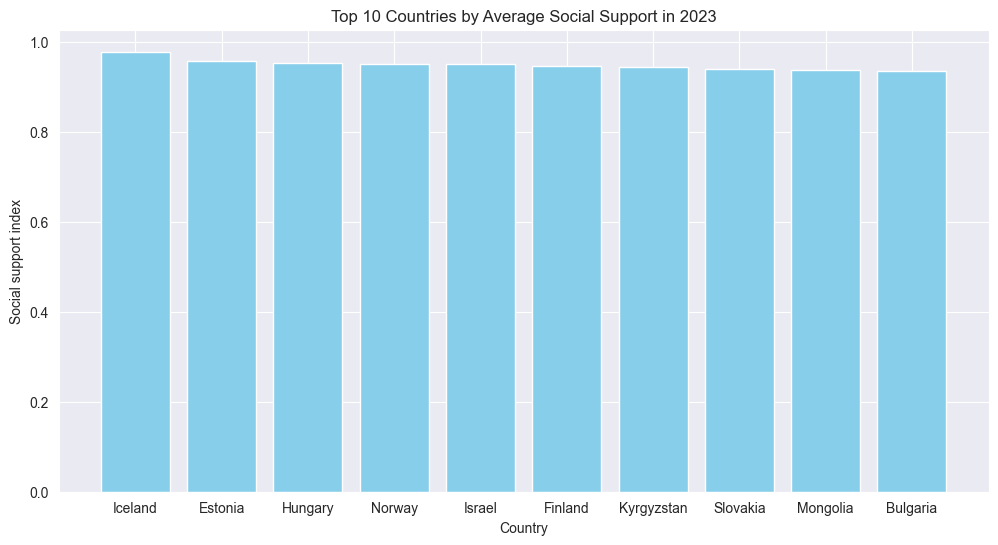

In [1149]:
# Group the data by year and country, then calculate the average Social Support value
# From the 2023 data, group again by country (in case of duplicates), calculate the mean Social Support,
# sort countries by Social Support in descending order, and select the top 10 countries
df_top10 = (df[df['year']==2023]
            .groupby('Country name')['Social support']
            .mean()
            .sort_values(ascending=False)
            .head(10).
            reset_index())

plt.figure(figsize=(12,6))
plt.bar(df_top10['Country name'],df_top10['Social support'],color = "skyblue" )
plt.title('Top 10 Countries by Average Social Support in 2023')
plt.xlabel('Country')
plt.ylabel('Social support index')
plt.show()
















### **Question 8: Create a pie chart showing proportion of 'Country name' in the dataset (top 10 countries)**
#### Use df['Country name'].value_counts().head(10) and plt.pie() to show the most frequently appearing countries

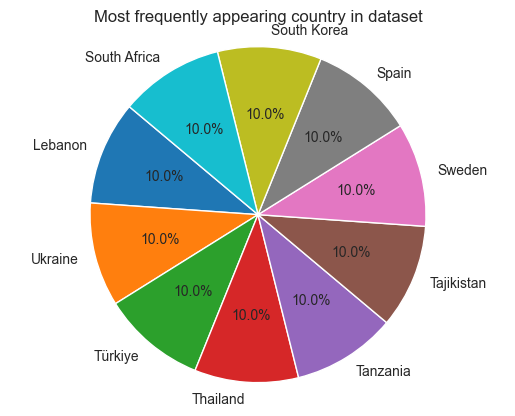

In [1150]:
# get country name value counts from dataset and sort them so that biggest count is first
df_countries = df['Country name'].value_counts().sort_values(ascending=False).head(10).reset_index()

plt.pie(df_countries['count'],labels=df_countries['Country name'],autopct='%1.1f%%',startangle=140)

plt.title('Most frequently appearing country in dataset')
plt.axis('equal')
plt.show()


### **Question 9: Perform Linear Regression to predict 'Life Ladder' using multiple predictors**
#### Hint: Use 'Log GDP per capita', 'Social support', and 'Healthy life expectancy at birth' as X variables and fit a model

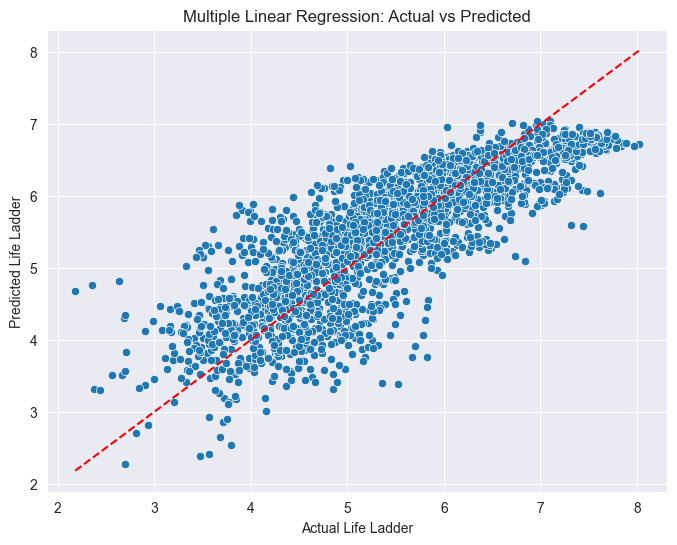

In [1151]:
# Keep only the relevant columns and drop rows with missing values
df_cleaned = df[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth']].dropna()

# Define the predictor (independent variable) and target (dependent variable)
X = df_cleaned[['Log GDP per capita','Social support','Healthy life expectancy at birth']] 
y = df_cleaned['Life Ladder']

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the fitted model
df_cleaned['Prediction'] = model.predict(X)

# Plot actual vs predicted Life Ladder values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=df_cleaned['Prediction'])  # Actual vs predicted

# Label axes and title the plot
plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.title('Multiple Linear Regression: Actual vs Predicted')

# Add a red dashed reference line where predicted = actual (perfect predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')


plt.show()

### **Question 10: Plot residuals from the model above**
#### Hint: Subtract predicted values from actual 'Life Ladder', then plot residuals vs predictions using plt.scatter()

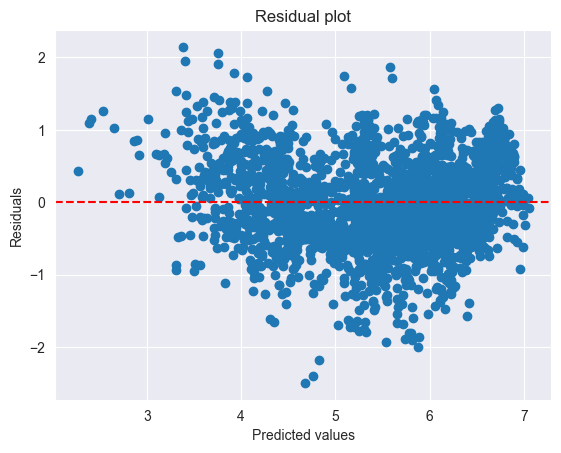

In [1152]:
# subtract predicted values from Life ladder
residuals = y-df_cleaned['Prediction']



# x is prediction y is error. if values goes near the red line prediction would be perfect
plt.scatter(x=df_cleaned['Prediction'],y= residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()